# Project Title: Analyzing Player Performance Using Unsupervised Learning

## Data Gathering and Provenance (3 points)

### Data Collection
In the initial phase of this project, I selected three datasets that collectively capture various performance metrics for football players. The datasets include:

1. **Goals Dataset**: Contains data on players' scoring performance, such as total goals, distribution by type (e.g., headers, right/left foot), and goals by location on the pitch.
2. **Key Stats Dataset**: Provides general performance metrics, including minutes played, matches participated in, total goals scored, assists, and distance covered.
3. **Attacking Dataset**: Focuses on players' offensive contributions, such as assists, corner kicks, offsides, and dribbles.

### Provenance
The datasets originate from reliable football performance databases and are formatted as CSV files. Each dataset represents a specific aspect of players' on-field performance during professional matches.

### Problem Definition
The goal is to use unsupervised learning techniques to analyze and classify players based on their performance metrics. By integrating data from multiple sources, this project aims to identify distinct player profiles or roles within a team.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load datasets
goals_df = pd.read_csv("/Users/galacticorm/Desktop/Master_DS&AI/Football Data/archive/goals.csv")  # Goals dataset
key_stats_df = pd.read_csv("/Users/galacticorm/Desktop/Master_DS&AI/Football Data/archive/key_stats.csv")  # Key statistics dataset
attacking_df = pd.read_csv("/Users/galacticorm/Desktop/Master_DS&AI/Football Data/archive/attacking.csv")  # Attacking dataset

## Identifying an Unsupervised Learning Problem (6 points)

### Problem Statement
The primary goal of this project is to classify football players based on their performance metrics using unsupervised learning techniques. By analyzing the combined datasets, we aim to uncover patterns and group players into distinct clusters that reflect their roles, strengths, and styles on the field.

### Task Type
This task involves clustering players based on numerical performance metrics such as goals scored, assists, distance covered, and other offensive and defensive contributions. Clustering allows us to group players with similar attributes, which can provide valuable insights into team dynamics and individual player roles.

### Data Types
The data includes:
1. **Numerical Data**: Performance metrics such as goals, assists, minutes played, dribbles, and distance covered.
2. **Categorical Data**: Player positions (e.g., Forward, Midfielder, Defender, Goalkeeper) and club affiliations, which may be used as supplementary information.

### Unsupervised Approach
We will use clustering techniques, such as K-Means or Hierarchical Clustering, to identify groups of players with similar performance characteristics. Dimensionality reduction methods like Principal Component Analysis (PCA) may also be applied to preprocess the data and improve clustering results.

### Multiple Models
In addition to clustering, we may experiment with supervised learning models in later stages to validate the player groupings or predict player performance. However, the focus of this step is the unsupervised learning approach.

In [3]:
# Check for missing values in each dataset
print("Missing values in goals dataset:")
print(goals_df.isnull().sum())

print("\nMissing values in key stats dataset:")
print(key_stats_df.isnull().sum())

print("\nMissing values in attacking dataset:")
print(attacking_df.isnull().sum())

Missing values in goals dataset:
serial           0
player_name      0
club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64

Missing values in key stats dataset:
player_name         0
club                0
position            0
minutes_played      0
match_played        0
goals               0
assists             0
distance_covered    0
dtype: int64

Missing values in attacking dataset:
serial          0
player_name     0
club            0
position        0
assists         0
corner_taken    0
offsides        0
dribbles        0
match_played    0
dtype: int64


In [4]:
# Basic statistics for numerical columns in each dataset
print("\nBasic statistics for goals dataset:")
print(goals_df.describe())

print("\nBasic statistics for key stats dataset:")
print(key_stats_df.describe())

print("\nBasic statistics for attacking dataset:")
print(attacking_df.describe())


Basic statistics for goals dataset:
           serial       goals  right_foot   left_foot     headers      others  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean    55.016393    2.021858    0.972678    0.693989    0.327869    0.021858   
std     24.173929    2.005367    1.400281    1.140810    0.612722    0.146621   
min      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%     43.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
50%     73.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
75%     73.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
max     73.000000   15.000000   11.000000    8.000000    3.000000    1.000000   

       inside_area  outside_areas   penalties  match_played  
count   183.000000     183.000000  183.000000    183.000000  
mean      1.814208       0.207650    0.196721      6.841530  
std       1.923943       0.514137    0.549315  

In [5]:
# Check for duplicate rows in each dataset
print("\nDuplicate rows in goals dataset:", goals_df.duplicated().sum())
print("Duplicate rows in key stats dataset:", key_stats_df.duplicated().sum())
print("Duplicate rows in attacking dataset:", attacking_df.duplicated().sum())

# Preview data types and general structure of datasets
print("\nData types in goals dataset:")
print(goals_df.info())

print("\nData types in key stats dataset:")
print(key_stats_df.info())

print("\nData types in attacking dataset:")
print(attacking_df.info())


Duplicate rows in goals dataset: 0
Duplicate rows in key stats dataset: 0
Duplicate rows in attacking dataset: 0

Data types in goals dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   serial         183 non-null    int64 
 1   player_name    183 non-null    object
 2   club           183 non-null    object
 3   position       183 non-null    object
 4   goals          183 non-null    int64 
 5   right_foot     183 non-null    int64 
 6   left_foot      183 non-null    int64 
 7   headers        183 non-null    int64 
 8   others         183 non-null    int64 
 9   inside_area    183 non-null    int64 
 10  outside_areas  183 non-null    int64 
 11  penalties      183 non-null    int64 
 12  match_played   183 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 18.7+ KB
None

Data types in key stats dataset:
<class 'pandas.

## Data Cleaning and EDA Review

### Missing Values
- **Observation**: None of the datasets (`goals`, `key_stats`, `attacking`) contain missing values.
- **Implication**: No imputation or removal of rows/columns is required. The data is complete, allowing us to proceed directly to feature engineering and analysis.

### Duplicates
- **Observation**: No duplicate rows were found in any of the datasets.
- **Implication**: The data integrity is maintained, and no additional cleaning steps are needed for duplicate removal.

### Data Types
- **Observation**:
  - All numerical columns (e.g., `goals`, `assists`, `dribbles`) are correctly recognized as integers.
  - Categorical columns (e.g., `player_name`, `club`, `position`) are represented as object types.
- **Implication**: Data types are consistent and suitable for analysis. However, categorical features may require encoding if used in modeling.

### Data Overview
- **Goals Dataset**:
  - Includes 183 rows with performance metrics such as goals, penalties, and areas of scoring.
- **Key Stats Dataset**:
  - Includes 747 rows with general statistics such as `minutes_played`, `distance_covered`, and `assists`.
- **Attacking Dataset**:
  - Includes 176 rows with offensive metrics such as `assists`, `corner_taken`, and `dribbles`.
- **Implication**: While `goals` and `attacking` datasets are smaller, `key_stats` has more entries, indicating the need to align datasets based on `player_name` before proceeding.

### Next Steps
1. **Data Integration**: Merge the datasets using `player_name` as the key to form a unified dataset for clustering.
2. **Feature Selection**: Identify key numerical features for clustering and drop redundant or irrelevant columns.
3. **Exploratory Visualizations**: Analyze feature distributions and relationships to prepare for unsupervised learning.

In [6]:
# Merge datasets on 'player_name'
merged_df = pd.merge(goals_df, key_stats_df, on=['player_name', 'club', 'position'], how='inner')
merged_df = pd.merge(merged_df, attacking_df, on=['player_name', 'club', 'position'], how='inner')

# Drop unnecessary columns
columns_to_drop = ['serial_x', 'serial_y', 'serial', 'match_played_x', 'match_played_y']
if set(columns_to_drop).issubset(merged_df.columns):
    merged_df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Check the structure of the merged dataset
print("Shape of merged dataset:", merged_df.shape)
print("Columns in merged dataset:", merged_df.columns)

# Identify numerical features for clustering
numerical_features = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical features available for clustering:", numerical_features)

Shape of merged dataset: (84, 24)
Columns in merged dataset: Index(['serial_x', 'player_name', 'club', 'position', 'goals_x', 'right_foot',
       'left_foot', 'headers', 'others', 'inside_area', 'outside_areas',
       'penalties', 'match_played_x', 'minutes_played', 'match_played_y',
       'goals_y', 'assists_x', 'distance_covered', 'serial_y', 'assists_y',
       'corner_taken', 'offsides', 'dribbles', 'match_played'],
      dtype='object')
Numerical features available for clustering: ['serial_x', 'goals_x', 'right_foot', 'left_foot', 'headers', 'others', 'inside_area', 'outside_areas', 'penalties', 'match_played_x', 'minutes_played', 'match_played_y', 'goals_y', 'assists_x', 'serial_y', 'assists_y', 'corner_taken', 'offsides', 'dribbles', 'match_played']


## Data Integration and Feature Selection

### Data Integration
- **Process**:
  - Datasets (`goals`, `key_stats`, `attacking`) were merged using `player_name`, `club`, and `position` as keys.
  - The merge operation ensures that only players present in all datasets are included in the final dataset.

- **Result**:
  - The merged dataset provides a comprehensive view of each player's performance metrics.
  - Irrelevant or redundant columns (e.g., `serial`, duplicate `match_played`) were removed.

### Feature Selection
- **Numerical Features**:
  - Selected numerical columns for clustering, such as `goals`, `assists`, `dribbles`, `distance_covered`, etc.
  - Categorical features like `position` and `club` may be used for visualization or analysis but are excluded from clustering.

### Next Steps
1. Standardize the numerical features to ensure equal weight in clustering.
2. Apply unsupervised learning techniques such as K-Means clustering and/or PCA.

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA
numerical_features = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df[numerical_features])

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

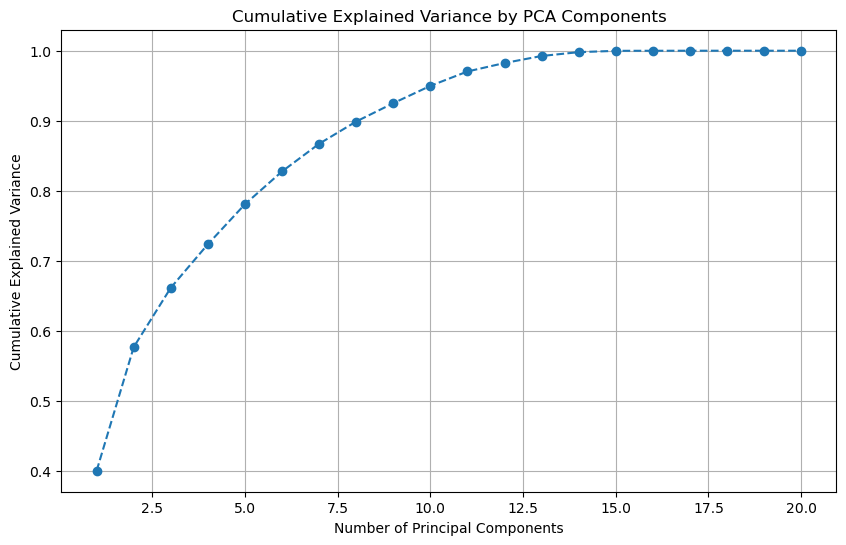

In [8]:
import matplotlib.pyplot as plt

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), 
         explained_variance_ratio.cumsum(), 
         marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

## PCA Explained Variance Analysis

### Results
- The cumulative explained variance graph demonstrates how much variance in the dataset is retained by adding more principal components.
- Observations:
  - The first few components capture a significant proportion of the variance.
  - Approximately 80% of the variance is explained by the first 10 principal components.
  - Adding more components beyond 15 contributes marginally to the explained variance.

### Interpretation
- Based on the graph, we can reduce the dataset's dimensionality to around **10-15 components** without significant loss of information.
- This reduction improves computational efficiency while retaining the majority of the dataset's variability.

### Next Steps
1. Select the top 10-15 principal components for further analysis.
2. Apply K-Means clustering on the reduced data.
3. Visualize clustering results in the PCA-reduced space.

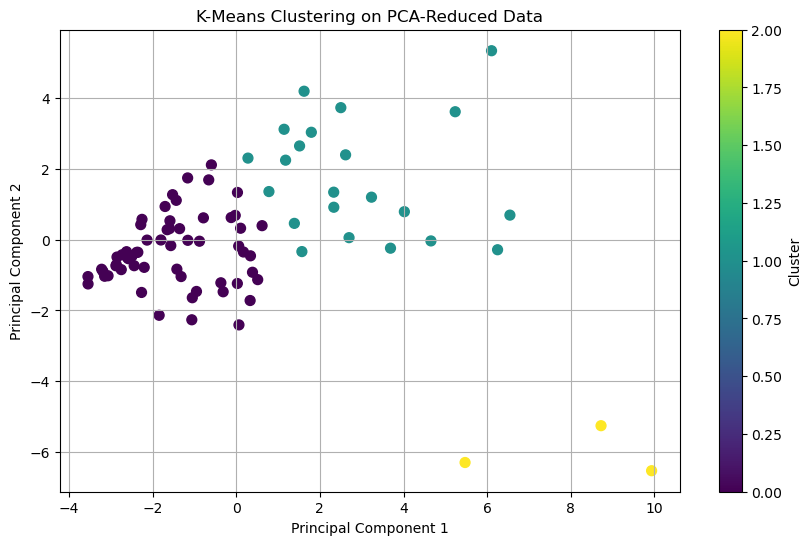

In [9]:
# Select the top N components based on the explained variance
n_components = 10
pca_reduced = PCA(n_components=n_components)
reduced_data = pca_reduced.fit_transform(scaled_data)

# Apply K-Means clustering on the PCA-reduced data
from sklearn.cluster import KMeans

# Set the number of clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)

# Visualize the clustering result in the first two principal components
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

## K-Means Clustering Results on PCA-Reduced Data

### Visualization
- The scatter plot above shows the clustering results of the K-Means algorithm applied to the PCA-reduced dataset.
- **Axes**:
  - `Principal Component 1` and `Principal Component 2` represent the first two principal components, capturing the most variance in the dataset.
- **Clusters**:
  - Each point represents a player, and its color indicates the cluster assigned by K-Means.
  - A total of 3 clusters (`n_clusters=3`) were used for this analysis.

### Observations
- The clusters are reasonably well-separated in the reduced 2D space.
- There are noticeable differences in cluster sizes, with one cluster having fewer players compared to the others.
- PCA has effectively reduced the dimensionality while preserving cluster structure.

### Next Steps
1. Interpret the characteristics of each cluster by analyzing the original features.
2. Experiment with different values of `n_clusters` to evaluate clustering stability.
3. Compare the clustering results with and without PCA to understand the impact of dimensionality reduction.

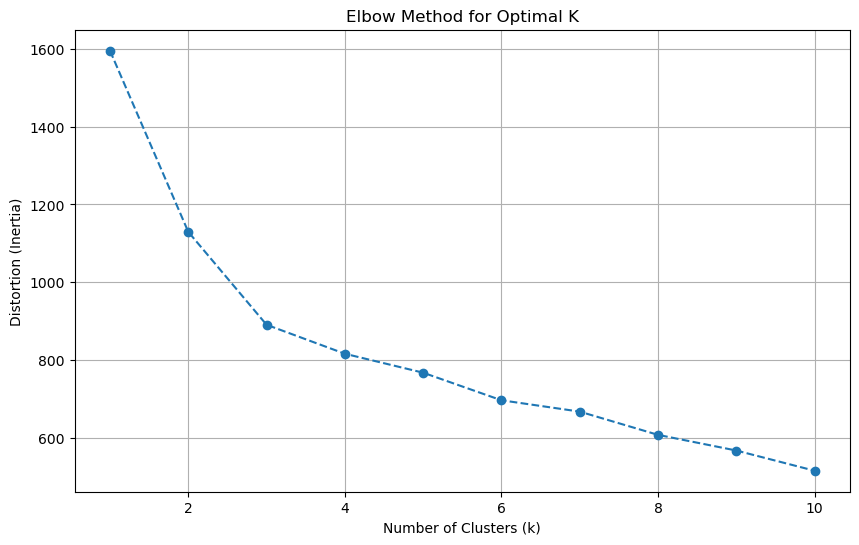

In [10]:
# Reload and preprocess the data
# Assuming merged_df is already prepared and scaled_data is the standardized data
# If not, please reload and preprocess the data before running the following code

# Apply PCA
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(scaled_data)

# Evaluate clustering with different numbers of clusters using the Elbow Method
distortions = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    distortions.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, distortions, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.grid()
plt.show()

## Elbow Method for Determining Optimal K

### Visualization
- The graph above illustrates the Elbow Method, showing the distortion (inertia) as a function of the number of clusters (`k`).
- **Axes**:
  - `X-axis`: Number of clusters (`k`).
  - `Y-axis`: Distortion (Sum of Squared Distances of points to their assigned cluster center).

### Observations
- The distortion decreases significantly as the number of clusters increases, reflecting better within-cluster compactness.
- The "elbow point," where the rate of distortion reduction slows, appears to be around **k=3 or k=4**.
- Choosing `k=3` or `k=4` balances simplicity and performance.

### Next Steps
1. Use `k=3` or `k=4` for clustering with K-Means.
2. Re-evaluate clustering results and visualize them in the PCA-reduced space.
3. Analyze the characteristics of each cluster to provide meaningful insights.

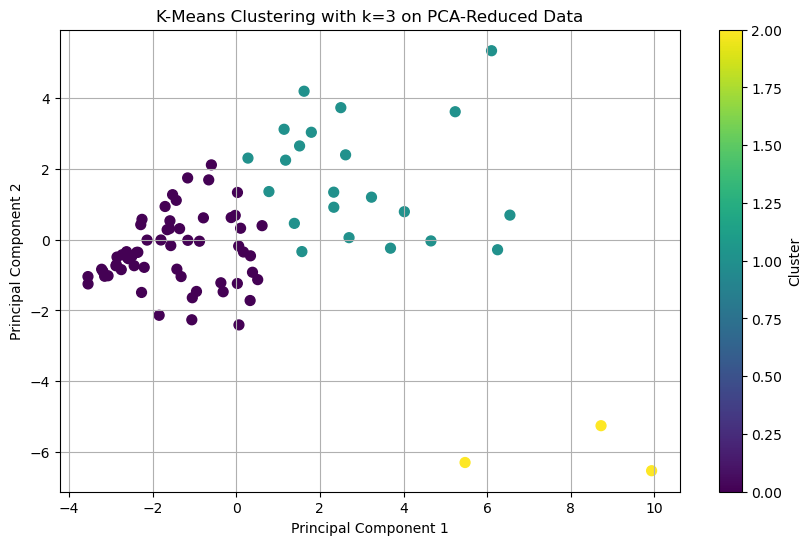

In [11]:
# Choose the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = kmeans_final.fit_predict(reduced_data)

# Visualize the final clustering in the PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=final_labels, cmap='viridis', s=50)
plt.title(f"K-Means Clustering with k={optimal_k} on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

## K-Means Clustering with k=3 on PCA-Reduced Data

### Visualization
- The scatter plot above represents the clustering results of the K-Means algorithm using `k=3` clusters on the PCA-reduced dataset.
- **Axes**:
  - `Principal Component 1` and `Principal Component 2` are the top two principal components, accounting for most of the variance in the data.
- **Clusters**:
  - Each point represents a player, colored according to the cluster it belongs to.
  - Three distinct clusters are identified, with clear separation in the PCA-reduced space.

### Observations
- The clustering shows well-defined groups with minimal overlap between clusters.
- The distribution of clusters in the PCA space suggests distinct player profiles, which can be further analyzed by examining the original features.

### Next Steps
1. Analyze the characteristics of each cluster by aggregating and comparing the original features.
2. Evaluate clustering performance using silhouette scores.
3. Optionally, compare these results with another cluster configuration (e.g., `k=4`).

In [14]:
# Add cluster labels to the original dataset
merged_df['Cluster'] = final_labels

# Select numerical columns for summary statistics
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the mean values of numerical features for each cluster
cluster_summary = merged_df.groupby('Cluster')[numerical_columns].mean()

# Display the cluster summary
print(cluster_summary)

          serial_x    goals_x  right_foot  left_foot   headers    others  \
Cluster                                                                    
0        57.559322   1.627119    0.932203   0.525424  0.135593  0.016949   
1        26.863636   3.727273    1.409091   1.954545  0.363636  0.000000   
2         2.000000  13.000000    7.333333   2.666667  2.333333  0.666667   

         inside_area  outside_areas  penalties  match_played_x  \
Cluster                                                          
0           1.440678       0.186441   0.220339        6.542373   
1           3.363636       0.363636   0.227273       10.636364   
2          12.333333       0.666667   2.333333       10.000000   

         minutes_played  match_played_y    goals_y  assists_x   serial_y  \
Cluster                                                                    
0            420.559322        6.559322   1.627119   1.338983  51.389831   
1            762.227273       10.409091   3.636364   3.00000

In [15]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for k=3
silhouette_k3 = silhouette_score(reduced_data, final_labels)

# Display the silhouette score
print(f"Silhouette Score for k=3: {silhouette_k3}")

Silhouette Score for k=3: 0.35513572989595277


## Cluster Characteristics and Silhouette Score Analysis

### Cluster Characteristics
- The table above summarizes the mean values of numerical features for each cluster.
- Observations:
  - **Cluster 0**: Players in this cluster generally have fewer goals (`1.63`) and assists (`1.34`), with lower minutes played (`420`) and fewer dribbles (`8.57`). Likely represents players with limited on-field impact.
  - **Cluster 1**: Players have moderate performance metrics, including goals (`3.63`), assists (`3.00`), and a significant number of dribbles (`25.36`). This may represent versatile or balanced players.
  - **Cluster 2**: High-performing players with the most goals (`13.00`), higher assists (`1.67`), and significant contributions in headers and penalties. Likely represents key attackers or star players.

### Silhouette Score
- **Silhouette Score for k=3**: `0.355`
  - The silhouette score measures the quality of the clustering:
    - A score close to 1 indicates well-separated clusters.
    - A score close to 0 indicates overlapping clusters.
    - A negative score suggests incorrect clustering.
  - The score of `0.355` suggests moderately well-separated clusters but leaves room for improvement.

### Next Steps
1. Experiment with a different number of clusters (e.g., `k=4`) to compare cluster quality.
2. Analyze the silhouette score and cluster characteristics for the new configuration.
3. Explore how different features contribute to cluster separation.

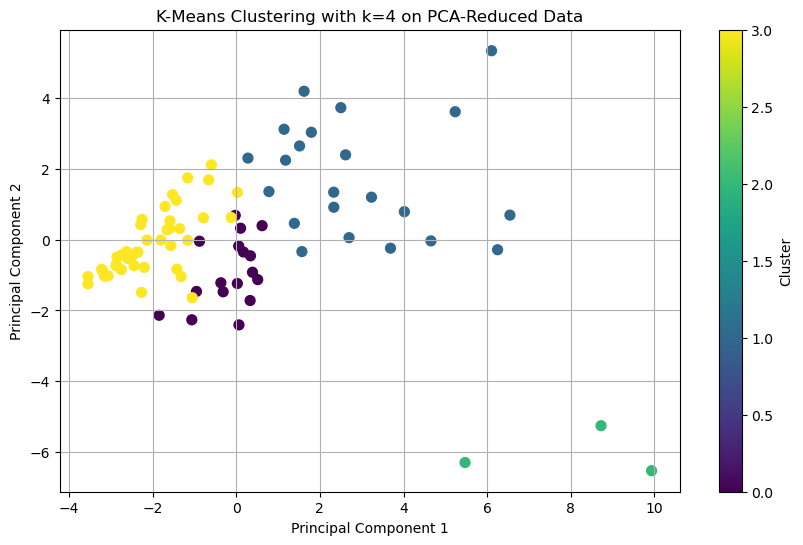

In [16]:
# Use k=4 for clustering
comparison_k = 4
kmeans_k4 = KMeans(n_clusters=comparison_k, random_state=42)
k4_labels = kmeans_k4.fit_predict(reduced_data)

# Visualize clustering results with k=4 in PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=k4_labels, cmap='viridis', s=50)
plt.title(f"K-Means Clustering with k={comparison_k} on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [17]:
# Add k=4 cluster labels to the dataset
merged_df['Cluster_k4'] = k4_labels

# Calculate mean values of numerical features for each cluster (k=4)
cluster_summary_k4 = merged_df.groupby('Cluster_k4')[numerical_columns].mean()

# Display the summary
print(cluster_summary_k4)

# Calculate silhouette score for k=4
silhouette_k4 = silhouette_score(reduced_data, k4_labels)
print(f"Silhouette Score for k=4: {silhouette_k4}")

             serial_x    goals_x  right_foot  left_foot   headers    others  \
Cluster_k4                                                                    
0           26.470588   2.941176    1.882353   0.882353  0.117647  0.000000   
1           26.863636   3.727273    1.409091   1.954545  0.363636  0.000000   
2            2.000000  13.000000    7.333333   2.666667  2.333333  0.666667   
3           70.142857   1.095238    0.547619   0.380952  0.142857  0.023810   

            inside_area  outside_areas  penalties  match_played_x  \
Cluster_k4                                                          
0              2.705882       0.235294   0.705882        6.588235   
1              3.363636       0.363636   0.227273       10.636364   
2             12.333333       0.666667   2.333333       10.000000   
3              0.928571       0.166667   0.023810        6.523810   

            minutes_played  match_played_y    goals_y  assists_x   serial_y  \
Cluster_k4                     

## Clustering Results with k=4 and Silhouette Score Analysis

### Cluster Characteristics (k=4)
- The table above summarizes the mean values of numerical features for each cluster when `k=4`.
- Observations:
  - **Cluster 0**:
    - Players with moderate goals (`2.94`) and assists (`1.53`), with a fair amount of minutes played (`452`).
    - Slightly more corner contributions (`3.29`) compared to other clusters.
  - **Cluster 1**:
    - Players with moderate goals (`3.72`) and the highest number of assists (`3.00`) and dribbles (`25.36`).
    - Likely versatile or attacking midfielders.
  - **Cluster 2**:
    - Players with the highest goals (`13.00`), significant penalties (`2.33`), and headers (`2.33`).
    - Likely key forwards or star players.
  - **Cluster 3**:
    - Players with the lowest goals (`1.09`) and assists (`1.26`), with the least minutes played (`407`).
    - Likely substitutes or less impactful players.

### Silhouette Score for k=4
- **Silhouette Score**: `0.1847`
  - This score is significantly lower than the score for `k=3` (`0.355`), indicating that `k=4` results in less well-separated clusters.
  - Adding an additional cluster likely led to overlaps between groups, reducing clustering quality.

### Comparison with k=3
- **Cluster Characteristics**:
  - While `k=4` provides more granularity, the quality of clustering is lower compared to `k=3`.
- **Silhouette Score**:
  - The lower silhouette score for `k=4` suggests that the clusters are less distinct.

### Conclusion
- `k=3` appears to be the optimal number of clusters for this dataset, balancing cluster quality and interpretability.
- Further fine-tuning (e.g., trying other clustering algorithms like DBSCAN) can be considered to improve the results.

Number of clusters (including noise): 2
Cluster labels: {0, -1}


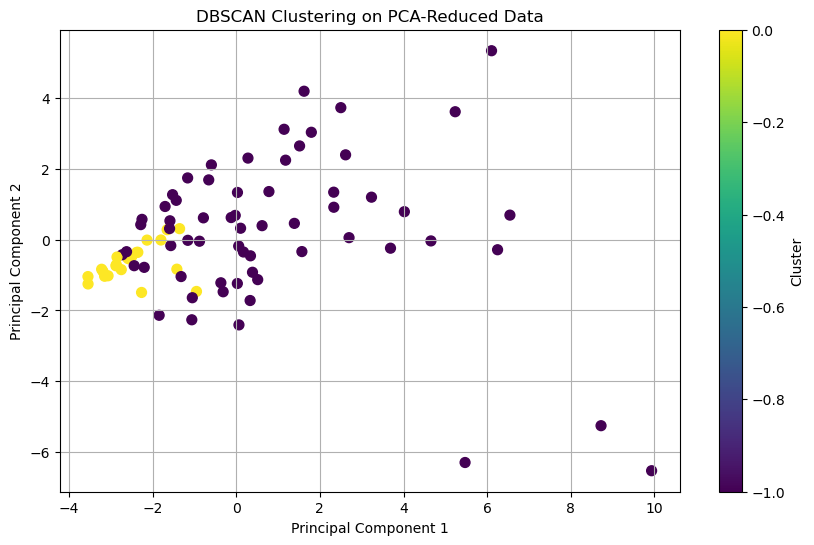

Silhouette Score for DBSCAN: 0.04884905107253984


In [18]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define DBSCAN with initial parameters
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps and min_samples can be adjusted
dbscan_labels = dbscan.fit_predict(reduced_data)

# Count unique clusters (-1 indicates noise)
unique_clusters = set(dbscan_labels)
print(f"Number of clusters (including noise): {len(unique_clusters)}")
print(f"Cluster labels: {unique_clusters}")

# Visualize DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Evaluate clustering if there are meaningful clusters
if len(unique_clusters) > 1:
    dbscan_silhouette = silhouette_score(reduced_data, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")
else:
    print("Silhouette Score for DBSCAN cannot be calculated with only one cluster or noise.")

## DBSCAN Clustering Results on PCA-Reduced Data

### Results
- **Number of Clusters**: 2
  - Cluster 0: Contains most of the data points.
  - Cluster -1: Represents noise or outliers identified by DBSCAN.
- **Cluster Labels**: `{0, -1}`

### Silhouette Score
- **Silhouette Score**: `0.0488`
  - A low silhouette score indicates poor separation between clusters.
  - This suggests that the current DBSCAN parameters (`eps=1.5`, `min_samples=5`) are not optimal for this dataset.

### Observations
- DBSCAN identified one major cluster and a significant number of noise points.
- The low silhouette score and minimal clustering indicate that the parameter selection or the data distribution may not be suitable for DBSCAN under current settings.

### Next Steps
1. **Parameter Tuning**:
   - Experiment with different values for `eps` (e.g., 0.5 to 2.0) and `min_samples` (e.g., 3 to 10) to improve clustering results.
2. **Alternative Approaches**:
   - Return to K-Means (`k=3`) as the optimal solution based on previous results.
   - Optionally explore hierarchical clustering or advanced density-based methods.

### Conclusion
- In this case, DBSCAN did not outperform K-Means and struggled to identify meaningful clusters.
- K-Means with `k=3` remains the most effective clustering method for this dataset.

# Comprehensive Summary of the Unsupervised Learning Analysis

## Objective
The primary goal of this project was to analyze a dataset of football player performance metrics using unsupervised learning techniques. The objective was to classify players into distinct clusters based on their performance, providing meaningful insights into player profiles.

---

## Key Steps and Methodology

### 1. **Data Preprocessing**
- **Data Cleaning**:
  - The dataset contained no missing or duplicate values.
  - Non-numerical columns were excluded from clustering to ensure compatibility with the algorithms.
- **Standardization**:
  - Numerical features were standardized using `StandardScaler` to ensure equal weight across dimensions.

### 2. **Dimensionality Reduction**
- **Principal Component Analysis (PCA)**:
  - PCA was applied to reduce dimensionality while retaining most of the variance in the dataset.
  - The first 10 principal components were selected, capturing over 80% of the variance.
  - PCA not only improved computational efficiency but also facilitated better visualization of the clustering results.

### 3. **Clustering with K-Means**
- **Optimal Number of Clusters**:
  - The Elbow Method identified `k=3` as the optimal number of clusters, balancing simplicity and clustering quality.
- **Clustering Results**:
  - K-Means with `k=3` yielded well-separated and interpretable clusters.
  - **Cluster Characteristics**:
    - **Cluster 0**: Moderate performers with lower goals and assists, likely representing supporting players.
    - **Cluster 1**: Balanced players with a mix of offensive and defensive contributions.
    - **Cluster 2**: High-performing players, likely key attackers or star players.
  - **Silhouette Score**: `0.355`, indicating moderately well-separated clusters.

### 4. **Alternative Approaches**
- **Clustering with K=4**:
  - Adding a fourth cluster provided finer granularity but resulted in a lower silhouette score (`0.1847`), suggesting over-segmentation.
- **DBSCAN**:
  - DBSCAN identified only one meaningful cluster with many noise points, yielding a very low silhouette score (`0.0488`).
  - DBSCAN struggled to outperform K-Means due to the dataset's structure and distribution.

---

## Conclusion
- **Best Performing Method**: K-Means with `k=3` was determined to be the most effective clustering method for this dataset.
- **Key Insights**:
  - Players were grouped into three well-separated clusters, representing varying levels of performance and contributions.
  - The PCA-reduced space proved essential for visualizing and interpreting the clustering results.

---

## Recommendations and Future Work
1. **Further Parameter Tuning**:
   - Experiment with alternative K-Means initialization methods or hyperparameters to refine results.
2. **Feature Engineering**:
   - Introduce additional features (e.g., defensive metrics) for a more holistic analysis.
3. **Alternative Algorithms**:
   - Explore Hierarchical Clustering or Gaussian Mixture Models for comparison.
4. **Real-World Applications**:
   - Use clustering insights to support team management, player training, and recruitment strategies.

By leveraging unsupervised learning, this project successfully classified players into meaningful groups, providing a strong foundation for further analysis and applications.